In [2]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

You can generate the data from the above GIF using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

* n_samples is the total number of samples to generate.
* centers is the number of centers to generate.
* cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:

+ A two-dimensional NumPy array with the x- and y-values for each of the samples
+ A one-dimensional NumPy array containing the cluster labels for each sample

Generate the synthetic data and labels

In [5]:
features, true_labels = make_blobs(
                                    n_samples=200,              # n_samples is the total number of samples to generate.
                                    centers=3,                  # centers is the number of centers to generate.
                                    cluster_std=2.75,           # cluster_std is the standard deviation.
                                    random_state=42
)

In [4]:
features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [7]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

## Data Preprocessing

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

### Standardization
 Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:
 
In this example, we’ll use the StandardScaler class.This class implements a type of feature scaling called standardization.

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
scaled_features

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446],
       [-0.6091802 , -0.96748146],
       [-0.27382069,  1.20384743],
       [-1.23815784, -1.11763029],
       [ 1.0309618 ,  1.14757573],
       [-0.57532971, -0.95983806],
       [ 0.68905553,  0.04436278],
       [ 1.28502265,  0.58676985],
       [ 1.72673134,  0.48622328],
       [ 0.91701946,  0.10048181],
       [ 0.1220911 ,  0.14198788],
       [-1.42295704, -1.43205314],
       [-0.21168821,  1.48245342],
       [-1.41945957, -1.11301166],
       [ 1.52188347, -0.57207183],
       [-0.17617985, -1.70099461],
       [ 2.26318104,  0.47775508],
       [ 0.92239799, -0.19130777],
       [-0.82837187, -1.53804066],
       [-0.13964997,  0.51871042],
       [-0.64291304, -1.33286646],
       [-0.52398081,  1.32693227],
       [-0.76872563,  1.23327655],
       [-1.07333975, -0.97623394],
       [-0.06668397,

## Kmeans

In [28]:
# initialize the model

kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )

Here are the parameters used in this example:

* init :- controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

* n_clusters:- sets k for the clustering step. This is the most important parameter for k-means.

* n_init:- sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

* max_iter:- sets the number of maximum iterations for each initialization of the k-means algorithm.

In [16]:
# fit the data in k means

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [17]:
# lowest SSE values

kmeans.inertia_

74.57960106819854

In [18]:
# final loaction of centroid

kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [19]:
# the number of iteration required to converge

kmeans.n_iter_

2

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_

In [20]:
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2])

In [25]:
count = 0
for i, j in zip(true_labels, kmeans.labels_):
    if i !=j :
        count += 1
print('Total number of true label not equal to kmeans.labels_:', count)

Total number of true label not equal to kmeans.labels_: 133


# Choosing the Appropriate Number of Clusters

In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

* The elbow method
* The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [29]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}



In [30]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    
    print(f'for {k} cluster sse value = {kmeans.inertia_}')
    sse.append(kmeans.inertia_)

C:\Users\cws\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for 1 cluster sse value = 399.9999999999999
for 2 cluster sse value = 173.23074893877765
for 3 cluster sse value = 74.57960106819854
for 4 cluster sse value = 61.30474344497749
for 5 cluster sse value = 52.27538725902107
for 6 cluster sse value = 43.96311767832819
for 7 cluster sse value = 38.52881875287542
for 8 cluster sse value = 34.82637407026124
for 9 cluster sse value = 31.13865746439756
for 10 cluster sse value = 27.89657236940263


notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease

## plot to find optimal number of k

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters

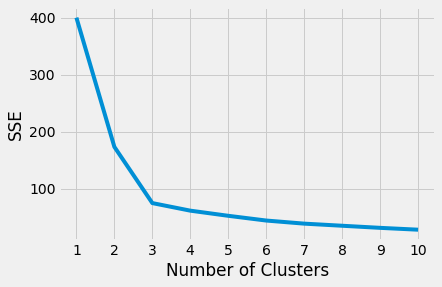

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()